In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.shape

(42000, 785)

In [11]:
test.shape

(28000, 784)

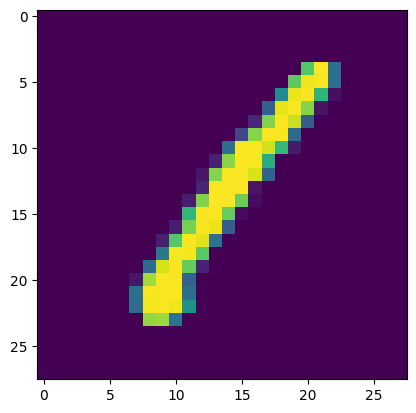

In [12]:
num = np.array(train.iloc[0, 1:]).reshape(28,28)
plt.imshow(num) # imshow will convert array into image
plt.show()

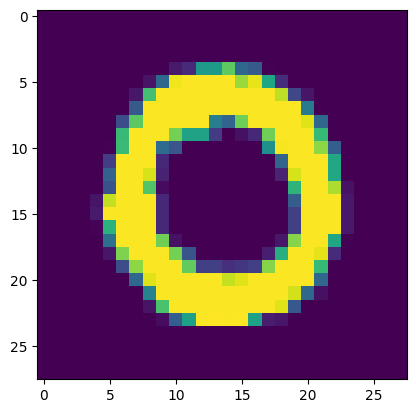

In [10]:

num = np.array(train.iloc[1, 1:]).reshape(28,28)
plt.imshow(num) # imshow will convert array into image
plt.show()

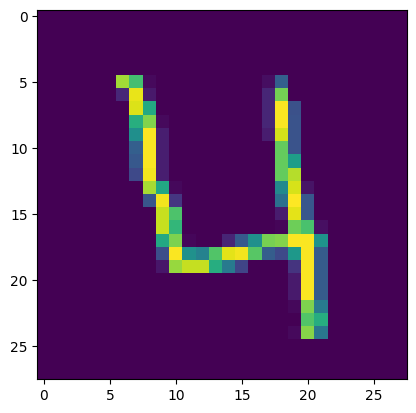

In [13]:
num = np.array(train.iloc[3, 1:]).reshape(28,28)
plt.imshow(num) # imshow will convert array into image
plt.show()

In [14]:
arr = train.iloc[3, 1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

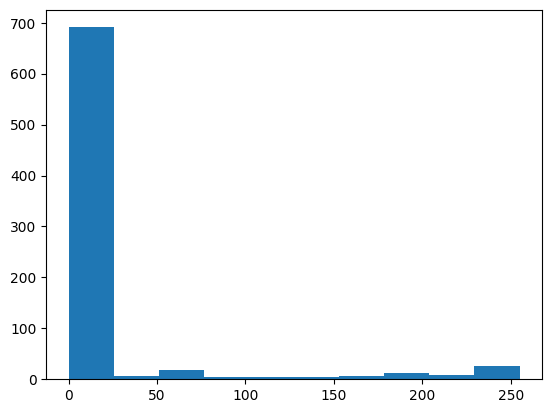

In [15]:
plt.hist(arr)

In [16]:
max(arr)

255

In [17]:
# Missing value count

train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [20]:
imputer.fit(train.iloc[:,:].values)

SimpleImputer()

In [21]:
imputer.transform(train.iloc[:,:].values)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [22]:
train.iloc[:,:] = imputer.transform(train.iloc[:,:].values)

In [23]:
train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [24]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
x = np.array(train)

x_train = x[:, 1:]
y_train = x[:, 0]
x_test = np.array(test)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
x_train = x_train.reshape(-1,28,28,1)

In [45]:
datagen = ImageDataGenerator(
    rotation_range=15,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)

datagen.fit(x_train)

In [46]:
x_train = x_train.reshape(-1,784)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

In [49]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
int(knn.predict(x_test[100].reshape(1,-1)))

<ipython-input-50-89e65c5fa511>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(x_test[100].reshape(1,-1)))


0

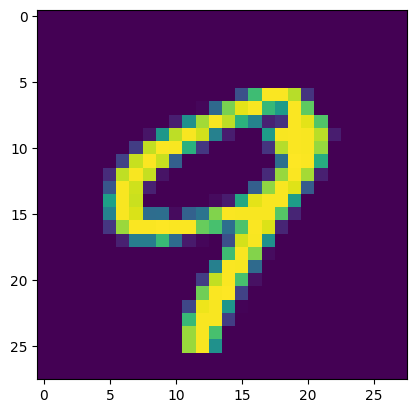

In [52]:
num = np.array(train.iloc[100, 1:]).reshape(28,28)
plt.imshow(num)
plt.show()

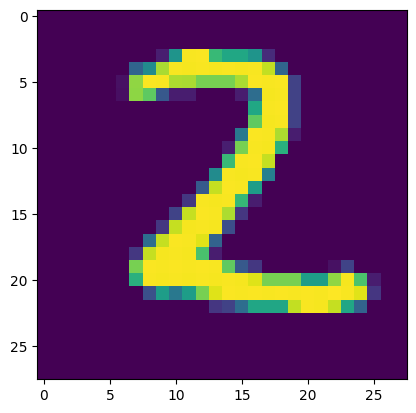

In [53]:
num = np.array(train.iloc[101, 1:]).reshape(28,28)
plt.imshow(num)
plt.show()

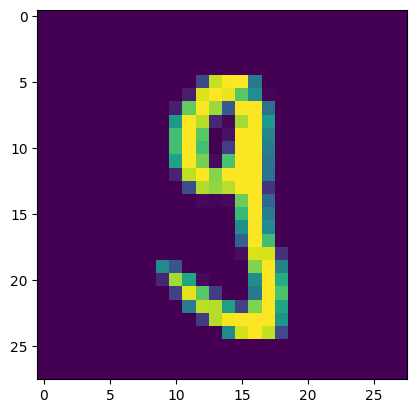

In [56]:
num = np.array(test.iloc[101, :]).reshape(28,28)
plt.imshow(num)
plt.show()

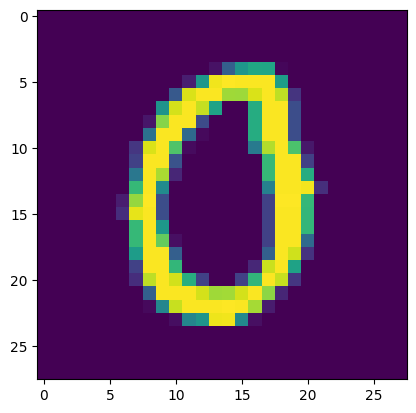

In [57]:
num = np.array(test.iloc[100, :]).reshape(28,28)
plt.imshow(num)
plt.show()

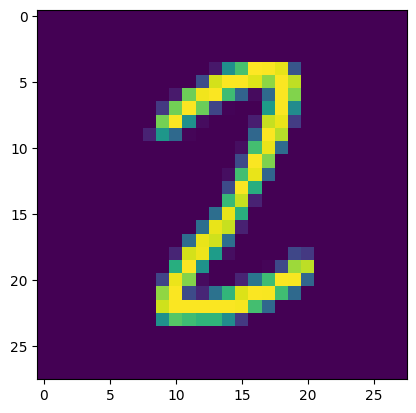

In [58]:
num = np.array(test.iloc[102, :]).reshape(28,28)
plt.imshow(num)
plt.show()

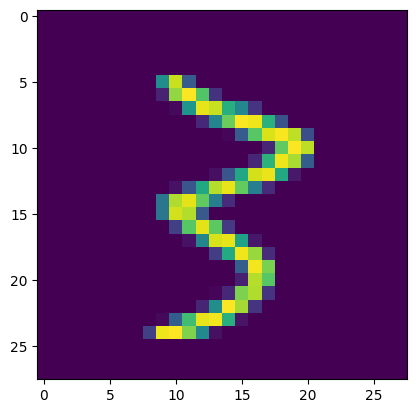

In [64]:
num = np.array(test.iloc[105, :]).reshape(28,28)
plt.imshow(num)
plt.show()